<a href="https://colab.research.google.com/github/4ervonec19/ML-DS-Intro-Stepik-course/blob/master/Support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [23]:
from sklearn.datasets import load_iris
iris_data = load_iris()
target_names = iris_data.target_names
target_classes = iris_data.target
iris_data = iris_data.data
from sklearn import svm
print(iris_data.shape)
target_classes.shape



(150, 4)


(150,)

In [35]:
kernel = ["linear", "poly", "rbf", "sigmoid"]
C_coef = np.linspace(0.001, 50, 100)


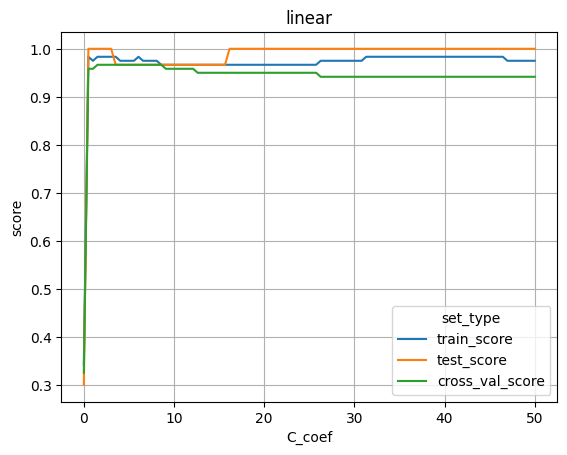

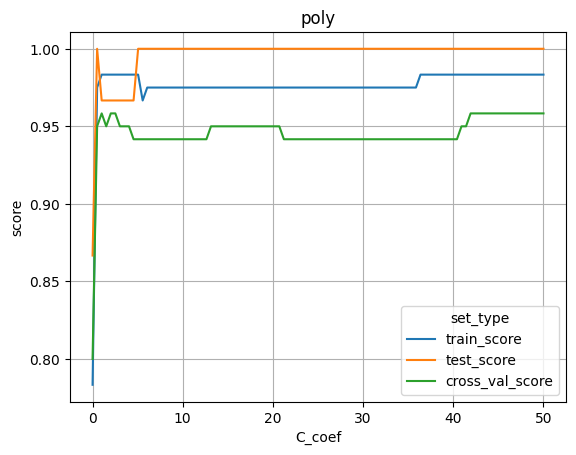

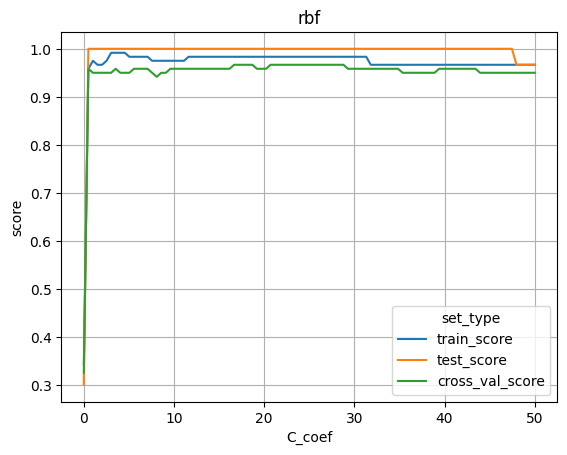

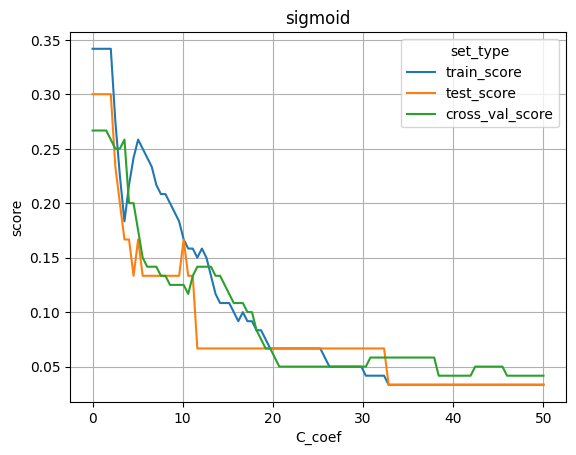

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

X_train, X_test, y_train, y_test = train_test_split(iris_data, target_classes, test_size = 0.2, random_state = 42)



for kernel_tick in kernel:
  scores_data = []
  for C in C_coef:
    classifier = svm.SVC(kernel=kernel_tick, C=C)
    classifier.fit(X_train, y_train)

    accuracy_score_train = accuracy_score(y_train, classifier.predict(X_train))
    accuracy_score_test = accuracy_score(y_test, classifier.predict(X_test))
    cross_validation_score = cross_val_score(classifier, X_train, y_train, cv = KFold()).mean()

    frame = pd.DataFrame({'C_coef': [C] ,'train_score': [accuracy_score_train], 'test_score': [accuracy_score_test],
                        'cross_val_score': [cross_validation_score]})

    scores_data.append(frame)

  scores_data = pd.concat(scores_data,  ignore_index=True)

  scores_data = pd.melt(scores_data, id_vars = ['C_coef'], value_vars = ['train_score', 'test_score', 'cross_val_score'],
                        var_name = 'set_type', value_name = 'score')

  sns.lineplot(x = 'C_coef', y = 'score',  hue = 'set_type', data = scores_data)
  plt.title(kernel_tick)
  plt.grid(True)
  plt.show()






<Axes: >

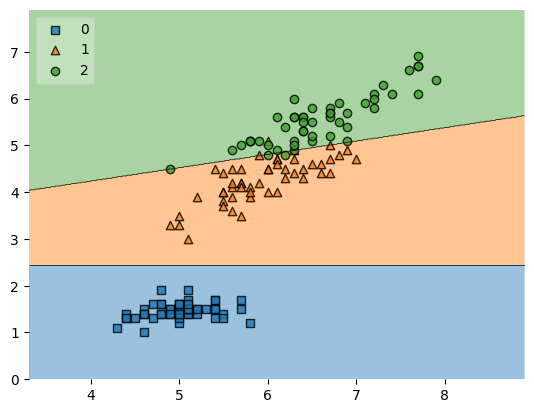

In [54]:
from mlxtend.plotting import plot_decision_regions
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
final_model = svm.SVC(kernel='linear', C=6.5)
final_model.fit(X, y)
plot_decision_regions(X, y, clf = final_model, legend=2)